**Содержание**:

1. [Теория](https://colab.research.google.com/drive/1WTRaTx9Rgpr5Sj6bovZWiQb72HPjXzw2?usp=sharing)
2. Практический ноутбук

# Создание модели нейронной сети

В этой части вы научитесь создавать собственную нейронную сеть. Это можно сделать всего в несколько строк с помощью библиотеки **Keras**. Подключите основу – класс создания последовательной модели **Sequential**.


---

**Важно!** Для ускорения обучения модели стоит переключиться на **GPU** в верхнем меню Colab:

    Среда выполнения --> Сменить среду выполнения --> Аппаратный ускоритель

---


---
Дополнительная информация: ([База знаний УИИ - «**Выбор GPU для обучения нейронной сети в Google Colaboratory**»](https://colab.research.google.com/drive/1p735mwS1wUP7iGeSLsWm06iTt9NPfNvY?usp=sharing))

---

In [ ]:
from tensorflow.keras.models import Sequential

С помощью него создайте экземпляр вашей модели:

In [ ]:
model = Sequential()

Это и есть ваша модель! Сейчас она больше похожа на пустую коробку. Чтобы она что-то делала, нужно поместить в нее какой-нибудь механизм. Это не механизм в обычном смысле слова, потому что вы будете оперировать не предметами, а информацией – главным ресурсом XXI века. Механизм будет принимать на вход и выдавать на выходе какие-то данные.

**Объекты**

Так из чего же вы можете создать механизм? Для начала определитесь, сколько информации вы будете давать нейросети на вход. Один экземпляр такой информации называется **объектом**, который всегда состоит из чисел. Позже вы рассмотрите, как они устроены и какими бывают.

Допустим, вы решили, что каждый ваш входной объект состоит из **10** чисел. Настройте сеть на вход из **10** чисел:

In [ ]:
from tensorflow.keras.layers import Dense
model.add(Dense(32, input_dim=10))

Внутри нейросеть состоит из слоев нейронов, и только что вы создали один из них. Этот первый слой называется ***Dense***-слоем (линейным или полносвязным слоем). Здесь же вы указали с помощью параметра **input_dim**, что ваша сеть принимает на вход последовательность из **10** чисел:

Полносвязный слой чаще других используется в нейросетях. Как механизм делится по слоям, так и некоторые слои тоже делятся на составляющие элементы. В разных слоях они имеют разные функции и названия. Например, в линейном слое этими элементами выступают **полносвязные нейроны**.

Их количество задается самым первым аргументом (в примере: **32**).

Нужно ли создавать выход сети? На самом деле нет. Результат, который выдает последний слой, и есть выход сети.

Значит, сеть готова к работе? Еще нет, потому что для работы нужно ее еще скомпилировать (собрать, подготовить к обучению) и обучить.

Для подготовки к обучению вам понадобятся еще две вещи – ***оптимизатор*** и ***функция потерь*** (или ***функция ошибки***). Они задаются с помощью метода модели `.compile()`:

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam')

При обучении нейронной сети обязательно указывают оптимизатор и функцию ошибки.

---
Дополнительная информация ([База знаний УИИ - «**Оптимизаторы (Light-версия)**»](https://colab.research.google.com/drive/1F9NTQzqEOrZeVbYm-urrxh7SrrrFZ1yg?usp=sharing))

Дополнительная информация ([База знаний УИИ - «**Оптимизаторы (Pro-версия)**»](https://colab.research.google.com/drive/1ErzVXvNJoSURyua5RPVG_eawaLAP6_PE?usp=sharing))

---
---
Дополнительная информация ([База знаний УИИ - «**Функции потерь**»](https://colab.research.google.com/drive/1ZlmUDi7csXboFXwN22D_pLDYQcvJmt07?usp=sharing))

---
Посмотрим, как теперь выглядит сеть, вызывая метод `.summary()`:


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
Total params: 352
Trainable params: 352
Non-trainable params: 0
_________________________________________________________________


Внимательно посмотрите на получившееся количество параметров.

При входе сети из **10** чисел и Dense-слое с **32** нейронами количество весовых коэффициентов будет $10 * 32 = 320$. Но, как видите, оно получается на **32** больше. Это происходит из-за наличия в слое ***нейрона смещения***.

Для чего он нужен? Бывают ситуации, в которых нейросеть просто не сможет найти верное решение из-за того, что нужная точка будет находиться вне пределов досягаемости. Именно для этого и нужны такие нейроны, чтобы иметь возможность сместить область определения.

Схематически нейроны смещения обычно не обозначаются, их вес учитывается по умолчанию при работе нейрона.

---
Дополнительная информация ([База знаний УИИ - «**Нейрон смещения**»](https://colab.research.google.com/drive/1gjMlYAC3J-COIy5QX41y5Sa1pdXrP5RP?usp=sharing))

---




Вы можете заметить, что у сети есть название **"sequential"**. Оно автоматически присваивается при создании.

У слоев также есть названия. Они указаны в левой колонке.

Колонка **"Output Shape"** показывает форму данных на выходе нейронного слоя.

В данном случае у вас получается:
* на вход нейронной сети подается последовательность из **10** элементов (вы указали это с помощью параметра **input_dim**)
* нейронная сеть состоит из одного слоя (**Dense**), который состоит из **32** нейронов (количество нейронов вы указали при создании слоя)
* на выходе нейронной сети будет последовательность из **32** элементов (выход нейронной сети равен выходу последнего слоя)

В выведенной информации вы можете увидеть строку **"Total params: 352"**. В ней указано общее количество параметров модели.

**Параметры**

Параметры модели – это все веса, внутренние настройки сети, которые определяют, как будет преобразован объект, подаваемый в сеть, прежде чем оказаться на выходе. Они автоматически изменяются при обучении.

Вы можете добавлять неограниченное количество слоев к сети:

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=10))
model.add(Dense(5))
model.add(Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32)                352       
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 523
Trainable params: 523
Non-trainable params: 0
_________________________________________________________________


Выше добавлено еще два линейных слоя. Теперь выход изменился: сеть на выходе выдает одно число. Как видите, также изменилось и общее число параметров. Чем больше слоев и нейронов в слоях, тем больше параметров сети.

Далее вы узнаете, как обучить модель нейронной сети.


# Распознавание рукописных цифр **MNIST**

Теперь вы научитесь делать удивительные вещи благодаря нейронным сетям. Если быть точнее, вы буквально в несколько строчек кода создадите собственную нейронную сеть и научите ее с высокой точностью распознавать рукописные цифры, изображенные на картинках. То есть на вход нейросети будет приходить картинка с изображением цифры, а на выходе вы получите значение цифры (число).


## Подготовка данных

Для начала добавьте в проект все необходимые модули:
* **mnist** – модуль для загрузки набора данных рукописных цифр, который вы используете при обучении нейронной сети;
* **Sequential** – модуль для создания последовательной модели нейронной сети;
* **Dense** – линейный (полносвязный) слой. Из таких слоев будет создана ваша нейросеть;
* **utils** – модуль с полезными инструментами для подготовки данных;
* **plt** – модуль рисования графиков.

In [ ]:
from tensorflow.keras.datasets import mnist     # Библиотека с базой рукописных цифр
from tensorflow.keras.models import Sequential  # Подключение класса создания модели Sequential
from tensorflow.keras.layers import Dense       # Подключение класса Dense - полносвязный слой
from tensorflow.keras import utils              # Утилиты для подготовки данных
import numpy as np                              # Работа с массивами
import matplotlib.pyplot as plt                 # Отрисовка изображений

# Отрисовка изображений в ячейках ноутбука
%matplotlib inline

Чтобы чему-то научить вашу нейронную сеть, понадобится набор данных для задачи, которую вы собираетесь решать. У вас это набор картинок, на которых изображены рукописные цифры от **0** до **9**. Следующей строкой кода вы скачаете эти данные:
* **x_train_org**, **y_train_org** – изображения для обучения нейронной сети;
* **x_test_org**, **y_test_org** – изображения для тестирования нейронной сети.


In [ ]:
# Загрузка из облака данных Mnist
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Сейчас те самые картинки, с помощью которых вы будете обучать нейронную сеть, представляют из себя матрицы чисел, где каждое число – это значение яркости пиксела (от **0** до **255**). Таких изображений в вашем тренировочном наборе данных **60000**, и их размер **28** на **28** пикселов. Поэтому форма массива данных выглядит так:

In [ ]:
# Вывод формы данных для обучения
x_train_org.shape

(60000, 28, 28)

Убедитесь, что ваши данные действительно представляют собой картинки с числами.

Для этого выберите из массива **x_train_org** какую-нибудь матрицу чисел и отобразите ее в серой шкале:

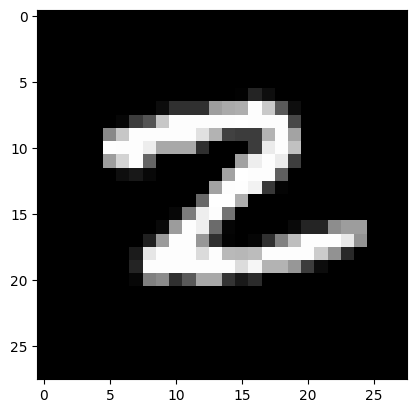

In [ ]:
# Номер картинки
n = 143

# Отрисовка картинки
plt.imshow(x_train_org[n], cmap='gray')

# Вывод n-й картинки
plt.show()

Видите изображение цифры **2**?

Если же вы взглянете на массив **y_train_org**, который содержит в себе метки для картинок (то есть правильные значения распознаваемых цифр на картинках), то увидите, что этой картинке соответствует значение **2**:


In [ ]:
# Вывод метки класса для n-го изображения
print(y_train_org[n])

2


Сейчас ваши данные имеют сложную структуру, где каждая картинка представляет собой двумерный массив данных.

Для обучения нейронной сети вам необходимо преобразовать изображение в более простой вид – в одномерную последовательность чисел (вектор).

Сделайте это с помощью метода `.reshape()`:


In [ ]:
# Изменение формы входных картинок с 28х28 на 784
# первая ось остается без изменения, остальные складываются в вектор
x_train = x_train_org.reshape(x_train_org.shape[0], -1)
x_test = x_test_org.reshape(x_test_org.shape[0], -1)

# Проверка результата
print(f'Форма обучающих данных: {x_train_org.shape} -> {x_train.shape}')
print(f'Форма  тестовых данных: {x_test_org.shape} -> {x_test.shape}')

Форма обучающих данных: (60000, 28, 28) -> (60000, 784)
Форма  тестовых данных: (10000, 28, 28) -> (10000, 784)


Теперь каждая картинка представлена в вашем наборе данных последовательностью из **784** чисел **(28x28)**.

Как вы уже знаете, чтобы нейронной сети было легче учиться, необходимо привести входные данные к некоему стандартному виду. В нашем случае числа, которые описывают картинку (те самые **784** числа), должны находиться в диапазоне от **0** до **1**, хотя сейчас они  в диапазоне от **0** до **255**, ведь они описывают интенсивность каждого пиксела. Поделив все эти значения на **255**, вы нормализуете входные данные:


In [ ]:
# Нормализация входных картинок
# Преобразование x_train в тип float32 (числа с плавающей точкой) и нормализация
x_train = x_train.astype('float32') / 255.

# Преобразование x_test в тип float32 (числа с плавающей точкой) и нормализация
x_test = x_test.astype('float32') / 255.

Также нужно провести некоторые преобразования и с метками классов, то есть с теми числами, которые отвечают на вопрос «Что же изображено на картинке?».

Для этого нужно привести все метки к виду ***one hot encoding***.

Это значит, что каждое число будет представлять собой последовательность (вектор) значений **0** или **1**. Последовательность будет длиной **10**, потому что всего существует **10** цифр, которые вы будете распознавать (от **0** до **9**). В векторе one hot encoding везде стоят нули, кроме позиции самой метки.
* Если ответ равен **5**, то one hot encoding представление будет таким:

      [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]

* А, например, для класса **3**:

      [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]


Чтобы не указывать везде явно число классов, хорошим тоном будет назначить константу. Тогда, если вам захочется использовать удачную архитектуру модели на других данных с другим количеством классов, не придется менять это значение в каждом месте, где оно требуется:

In [ ]:
# Задание константы количества распознаваемых классов

CLASS_COUNT = 10

Преобразуйте выходные данные в векторы one hot encoding с помощью функции `to_categorical()` модуля **utils**:

In [ ]:
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)

Теперь выходные данные для вашей нейронной сети выглядят следующим образом:

In [ ]:
# Вывод формы y_train
# 60 тысяч примеров, каждый длины 10 по числу классов
print(y_train.shape)

(60000, 10)


In [ ]:
# Вывод примера одного выходного вектора
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Для сравнения - в оригинальных выходных данных все метки классов - просто одиночные числа:

In [ ]:
# Вывод формы массива меток
print(y_train_org.shape)

(60000,)


In [ ]:
# Вывод метки, соответствующей 36-му элементу
print(y_train_org[36])

6


## Создание нейронной сети

Теперь самое интересное. Буквально за несколько строчек кода вы создадите свою собственную нейронную сеть, а потом научите ее распознавать цифры!

Для начала создайте объект нейронной сети с помощью класса **Sequential**:

    model = Sequential()

Сейчас это пустая нейронная сеть, не содержащая в себе никаких слоев и нейронов. Добавьте в нее несколько слоев нейронов, идущих друг за другом, последовательно, по образцу:

    model.add(Dense(400, activation='relu'))
    
В данном случае **400** – это количество нейронов в слое, а **'relu'** – функция активации, которая будет применяться после умножения значений входов нейрона на его веса.

---
Дополнительная информация ([База знаний УИИ - «**Функции активации**»](https://colab.research.google.com/drive/1pGc7CFdrkKBhcXLqZNUzLXH4N83rRAl7?usp=sharing))

---

In [ ]:
# Создание последовательной модели
model = Sequential()

# Добавление полносвязного слоя на 800 нейронов с relu-активацией
model.add(Dense(800, input_dim=784, activation='relu'))

# Добавление полносвязного слоя на 400 нейронов с relu-активацией
model.add(Dense(400, activation='relu'))

# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax'))

В целом, вы уже создали нейронную сеть. Теперь нужно подготовить ее к обучению (скомпилировать) и запустить само обучение.

Следующей строкой кода вы скомпилируете модель:

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

В методе `.compile()` вы назначаете функцию ошибки (**'categorical_crossentropy'**), оптимизатор нейронной сети (**'adam'**) и метрики, которые будут подсчитываться в процессе обучения нейросети (**['accuracy']**).



Метод `.summary()` выведет на экран структуру вашей нейронной сети в виде таблицы:

In [ ]:
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Вывод структуры модели
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 800)               628000    
                                                                 
 dense_5 (Dense)             (None, 400)               320400    
                                                                 
 dense_6 (Dense)             (None, 10)                4010      
                                                                 
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


Функция `plot_model()` модуля `utils` нарисует наглядную схему (граф) нейронной сети, она удобна для понимания и более сложных моделей.

Эта функция принимает следующие аргументы:

* **model** - модель, схему которой вы хотите построить (обязательный параметр);
* **to_file** - имя файла или путь к файлу, в который сохраняется схема (обязательный параметр);
* **show_shapes** - Показывать или нет формы входных/выходных данных каждого слоя (необязательный параметр, по умолчанию **False**);
* **show_layer_names** - показывать или нет название каждого слоя (необязательный параметр, по умолчанию **True**).

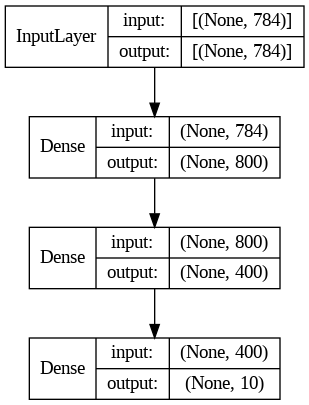

In [ ]:
utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

Здесь вы впервые сталкиваетесь с сохранением данных.

Сейчас сохранение графа модели произойдёт в хранилище виртуальной машины ноутбука. Найти сохраненный файл можно, нажав на иконку **"Файлы"** в левой части рабочего пространства Google Colab.

В данном случае при завершении сеанса все файлы будут удалены вместе с виртуальной машиной.

Если необходимо воспользоваться файлами в дальнейшем, можно сохранить их на свой Google-диск - это постоянное хранилище. Для этого необходимо подключить его:

```
from google.colab import drive
drive.mount('/content/drive/')
```
Необходимо перейти по ссылке и разрешить доступ.

Теперь данные могут быть загружены на диск, но для этого необходимо указывать полный путь для сохранения.


## Обучение нейронной сети

Именно сейчас начнется самая настоящая магия!

Одной строчкой кода вы запустите обучение нейронной сети и сможете наблюдать за процессом.

Для этого вызовите метод модели `.fit()` и передайте ему данные для обучения - **x_train, y_train**:

    model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

**batch_size** – размер батча, который указывает нейросети на то, сколько картинок она будет обрабатывать за один раз.

**epochs** – количество циклов обучения, то есть сколько раз нейронная сеть повторит просмотр и обучение на всех ваших данных.


In [ ]:
model.fit(x_train,        # обучающая выборка, входные данные
          y_train,        # обучающая выборка, выходные данные
          batch_size=128, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=15,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)      # 0 - не визуализировать ход обучения, 1 - визуализировать

Epoch 1/15
469/469 [==============================] - 7s 4ms/step - loss: 0.2073 - accuracy: 0.9383
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0755 - accuracy: 0.9762
Epoch 3/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0477 - accuracy: 0.9853
Epoch 4/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0336 - accuracy: 0.9893
Epoch 5/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0270 - accuracy: 0.9912
Epoch 6/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0206 - accuracy: 0.9931
Epoch 7/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0185 - accuracy: 0.9936
Epoch 8/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0158 - accuracy: 0.9948
Epoch 9/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0125 - accuracy: 0.9959
Epoch 10/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0157 - accuracy: 0.9947

Только что вы наблюдали процесс обучения нейронной сети на 15 эпохах. После каждого цикла обучения вы можете видеть среднее значение ошибки. Обратите внимание, что практически каждую эпоху значение метрики точности (**accuracy**) увеличивается. Это означает, что ваша нейронная сеть с каждым разом делает все более точное распознавание!

Теперь сохраните веса вашей модели, чтобы потом можно было снова их использовать:


In [ ]:
model.save_weights('model.h5')
model.load_weights('model.h5')

Метод `.save_weights()` сохранит веса вашей модели в хранилище, а метод `.load_weights()` загрузит их обратно.


## Распознавание рукописных цифр

Ура! Вы научили нейронную сеть распознавать цифры на картинках с огромной точностью – более **99**%.

Теперь вы можете использовать модель по прямому назначению. Выведите на экран какой-нибудь образец из тестового набора данных:


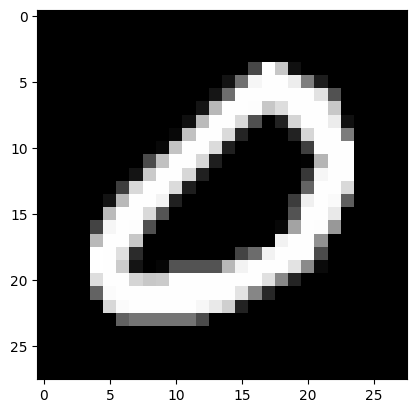

In [ ]:
# Номер тестовой цифры, которую будем распознавать
n_rec = np.random.randint(x_test_org.shape[0])

# Отображение картинки из тестового набора под номером n_rec
plt.imshow(x_test_org[n_rec], cmap='gray')
plt.show()

Теперь сохраните в переменную **x** эту картинку в виде набора из **784** чисел.

Это нужно для того, чтобы нейросеть сделала ***предсказание***, ведь она обучалась работать именно с такими последовательностями чисел:


In [ ]:
# Выбор нужной картинки из тестовой выборки
x = x_test[n_rec]

# Проверка формы данных
print(x.shape)

(784,)


In [ ]:
# Добавление одной оси в начале, чтобы нейронка могла распознать пример
# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
x = np.expand_dims(x, axis=0)

# Проверка формы данных
print(x.shape)

(1, 784)


Чтобы ваша сеть сделала предсказание, нужно вызвать метод `.predict()` и передать в него данные для распознавания:


In [ ]:
# Распознавание примера
prediction = model.predict(x)

1/1 [==============================] - 0s 77ms/step


Ответом вашей нейронной сети будет такой массив чисел:


In [ ]:
# Вывод результата - вектор из 10 чисел
print(prediction)

[[1.0000000e+00 1.2950315e-27 5.8127598e-15 4.3103217e-25 2.2470348e-24
  6.9105766e-28 2.4424716e-20 4.8785067e-22 2.0655704e-23 7.1440537e-18]]


Эти числа характеризуют вероятности принадлежности к конкретному классу. Самое первое число в этой последовательности отвечает на вопрос, какова вероятность, что на картинке изображена цифра **0**. Второе число говорит то же самое про цифру **1**. Сумма всех вероятностей равна единице, то есть предполагатся полный набор событий (только цифры от **0** до **9** и ничего другого):

In [ ]:
sum(prediction[0])

1.0000000000000058

Таким образом, индекс самой большой вероятности в этом списке чисел и будет ответом вашей нейронной сети:

In [ ]:
# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознана цифра: {pred}')

Распознана цифра: 0


Как видите, ваша сеть находит правильный ответ.

In [ ]:
# Вывод правильного ответа для сравнения
print(y_test_org[n_rec])

0


# Подведем итоги: вспомним изученный материал

В первой части вы познакомились с ИИ, узнали, что он бывает сильным и слабым, и то, что к 2050 развитие технологии достигнет пика. Для ИИ практически нет неразрешимых задач, и область его использования безгранична. Еще вы узнали, что нейронная сеть неспроста так называется, и у нее есть прототип – человеческий мозг и нейроны, из которых он состоит.

Далее вы перешли к рассмотрению различных моделей нейрона (биологической и математической). В НС нейроны отвечают за выделение определенного признака, при этом некоторое количество нейронов организовано в слои. Несколько слоев нейронов могут называться полноценной НС.

Сама по себе сеть без обучения не может хорошо решать задачи. Для этого ей требуются две выборки – обучающая и проверочная. Используя их, НС узнает, как правильно выполнить задачу. В этом ей помогает функция ошибки, которая указывает, в правильную ли сторону НС меняет свои веса. После этого вы познакомились с полносвязным слоем, нейроны которого связаны со всеми входными нейронами.

Во второй части вы попробовали создать свою первую модель нейронной сети. Подгрузили в ноутбук основу **Sequential**, которая отвечает за построение модели, и создали начальную модель: `model = Sequential()`. Но она выглядела как пустая коробка, в которую необходимо что-то положить. И первым стал слой **Dense** (полносвязный слой). Так появилась модель, но ее еще нужно было обучить, и для этого вы указали оптимизатор и функцию потерь при помощи метода `.compile()`. Завершили все это вызовом метода `.summary()`, посмотрев, как выглядит структура НС.

Затем вы перешли к практике и решили первую задачу по распознаванию рукописных цифр. Для этого импортировали все необходимые инструменты и загрузили данные **MNIST**. Определили форму массива данных и представление данных в виде картинки. Преобразовали данные для модели НС, превратив картинку **28x28** пикселов в последовательность из **784** чисел. Не оставили без внимания и метки классов. Чтобы сеть лучше классифицировала, перевели метки в формат **one hot encoding**. По изученной схеме создали НС и приступили к ее обучению. В завершение проверили, как обученная НС распознает отдельные изображения рукописных цифр из набора, на котором сеть не обучалась.

Итак, вы вспомнили все, что прошли в этом ноутбукe.

Поздравляем с первым шагом на пути изучения и применения нейронных сетей!


Небольшой практический задачник для закрепления пройденного материала:


---

[УИИ **Задачник** к теме "Введение в нейронные сети. Линейный слой (Dense)"](https://colab.research.google.com/drive/1UFXceobaybcHUdzxHgyQHtiQaqX-5A8-?usp=sharing)

---



**Содержание**:

1. [Теория](https://colab.research.google.com/drive/1WTRaTx9Rgpr5Sj6bovZWiQb72HPjXzw2?usp=sharing)
2. Практический ноутбук